In [1]:
from agents import Producer, Consumer, Influencer
from content_market import ContentMarket
import numpy as np
from test import test

In [2]:
topics = np.array([[1, 10]])

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [4]:
varied_param = 'influencer_attention_bound'
varied_param_legend_label = 'Influencer Bound'
varied_param_x_label = 'Influencer Attention Bound'

In [5]:
num_producers = 6
num_influencers = 1
num_consumers = 5

In [6]:
influencer_attention_bound = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]

In [7]:
stats, markets, tests = test(
    topics=topics,
    varied_param=varied_param,
    num_producers=num_producers,
    num_consumers=num_consumers,
    num_influencers=num_influencers,
    producer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=0.5,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=influencer_attention_bound,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    producer_type=Producer,
    consumer_type=Consumer,
    influencer_type=Influencer,
)

Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 0 / 100 done.
Total Social Welfare: 20.642985977041636
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 1 / 100 done.
Total Social Welfare: 20.75126044768603
Consumer rate change: 0.10877378236117996
Consumer utility change: 0.018554177232355418
Influencer rate change: 0.0
Influencer utility change: 0.0
Producer topic change: 0.010075330595549955
Producer utility change: 0.002583930747102281
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizin

In [8]:
print(stats)

{'total_social_welfare': [[0, 20.642985977041636, 20.75126044768603, 20.751671268968, 20.751689731490163, 20.751689732428673], [0, 20.642988704816183, 20.75126040809868, 20.75167128633833, 20.751689824285926, 20.751689825223927], [0, 23.223389957036805, 24.120663508525954, 24.12105159037268, 24.121068749007843], [0, 25.973926957837172, 26.654721193477723, 26.655219678162176, 26.655236501825513], [0, 28.0345223500026, 28.248962740775596, 28.251519540036433, 28.251548984410228, 28.251549007632686], [0, 30.510575871431215, 30.756109312645304, 30.758619786530602, 30.758650561527396, 30.758650676974085], [0, 32.67312646769438, 32.94689182238755, 32.9494315861838, 32.94946591136156, 32.94946630979564], [0, 34.54743139092041, 34.846087848155804, 34.84866730097195, 34.848705440804025, 34.84870550854215], [0, 36.17351392148425, 36.493951681294945, 36.49655812113846, 36.49659287052785, 36.49659289304904], [0, 37.59050661810254, 37.929999696721644, 37.932648745171875, 37.932685496257434, 37.93268

In [9]:
print(tests)

{'influencer_attention_bound': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]}


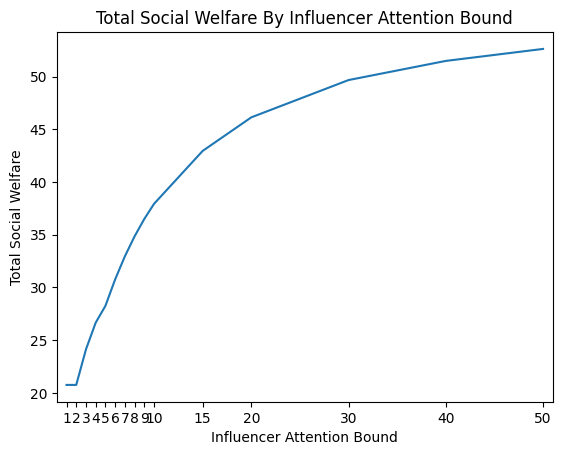

In [10]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", stats['total_social_welfare'], tests[varied_param], varied_param_x_label, 'Total Social Welfare')

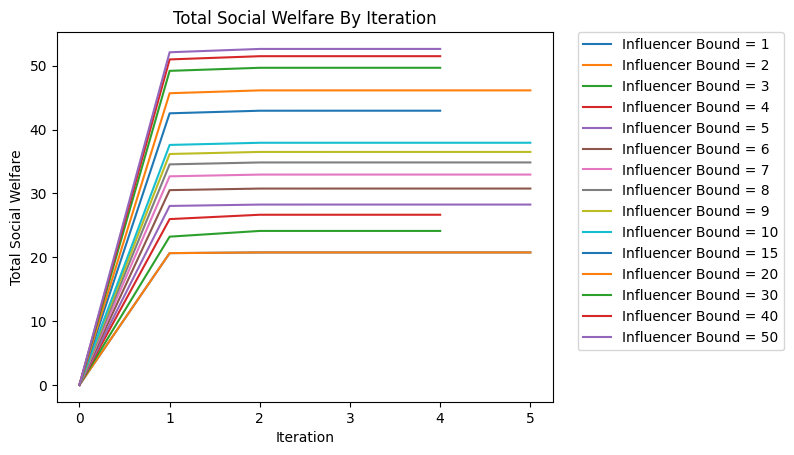

In [11]:
visualize.plot_value_by_iteration_by_test("Total Social Welfare By Iteration", stats['total_social_welfare'], tests[varied_param], varied_param_legend_label, 'Total Social Welfare')

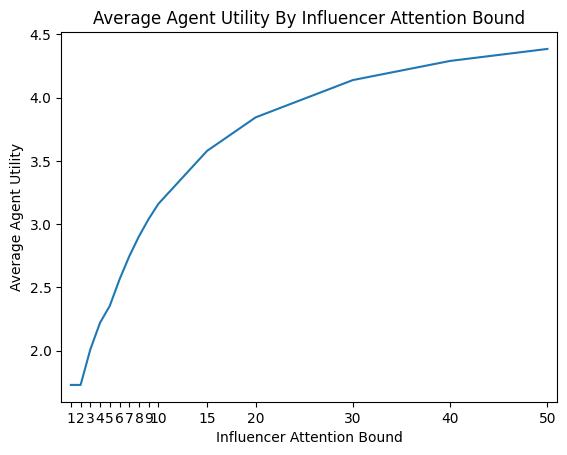

In [12]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", stats['average_agent_utilities'], tests[varied_param], varied_param_x_label, 'Average Agent Utility')

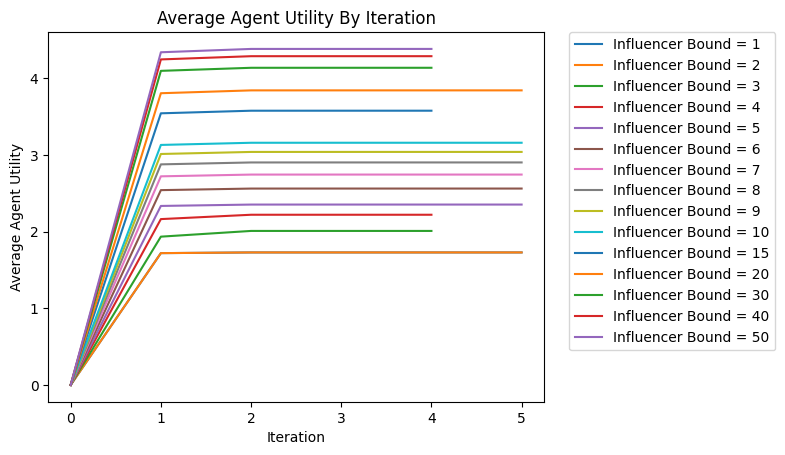

In [13]:
visualize.plot_value_by_iteration_by_test("Average Agent Utility By Iteration", stats['average_agent_utilities'], tests[varied_param], varied_param_legend_label, 'Average Agent Utility')

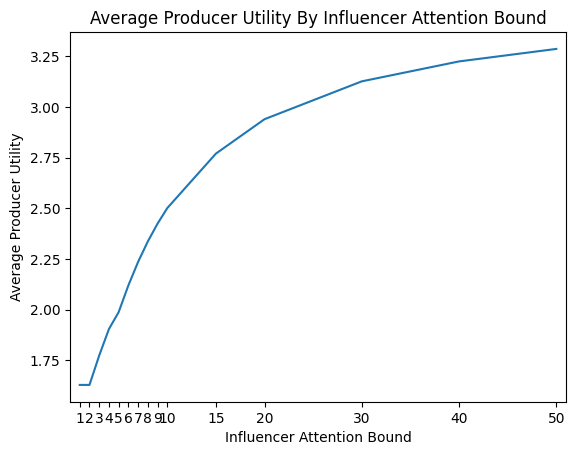

In [14]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", stats['average_producer_utilities'], tests[varied_param], varied_param_x_label, 'Average Producer Utility')

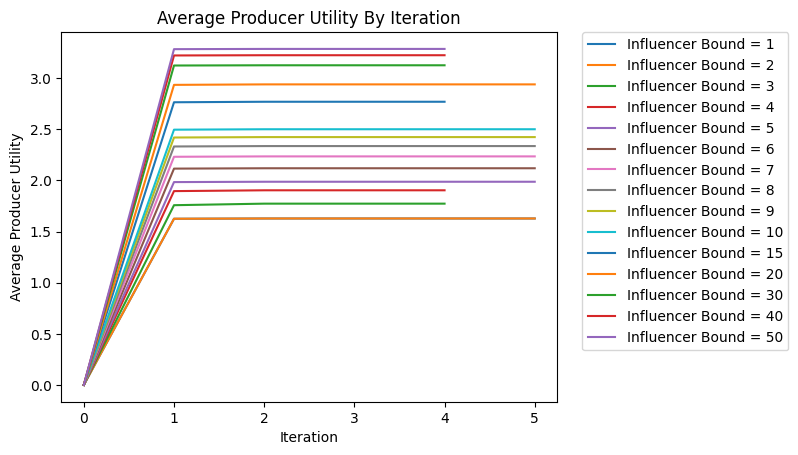

In [15]:
visualize.plot_value_by_iteration_by_test("Average Producer Utility By Iteration", stats['average_producer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Producer Utility')

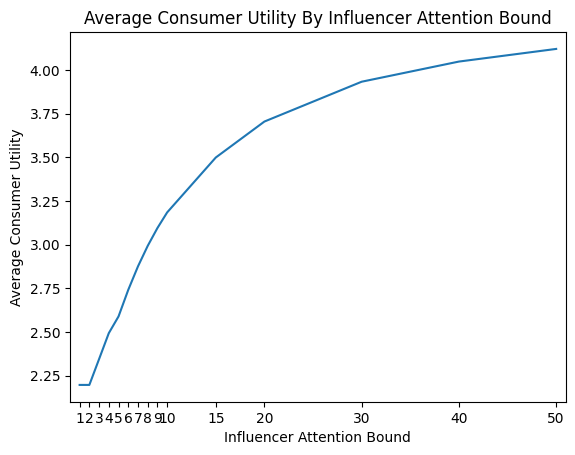

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", stats['average_consumer_utilities'], tests[varied_param], varied_param_x_label, 'Average Consumer Utility')

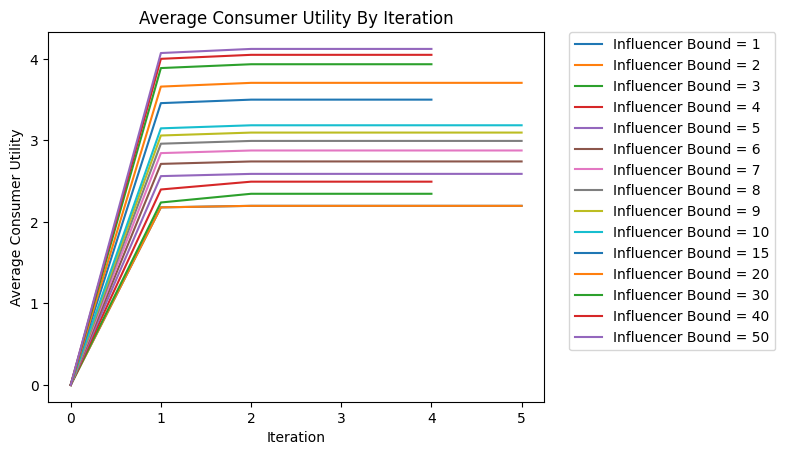

In [17]:
visualize.plot_value_by_iteration_by_test("Average Consumer Utility By Iteration", stats['average_consumer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Consumer Utility')

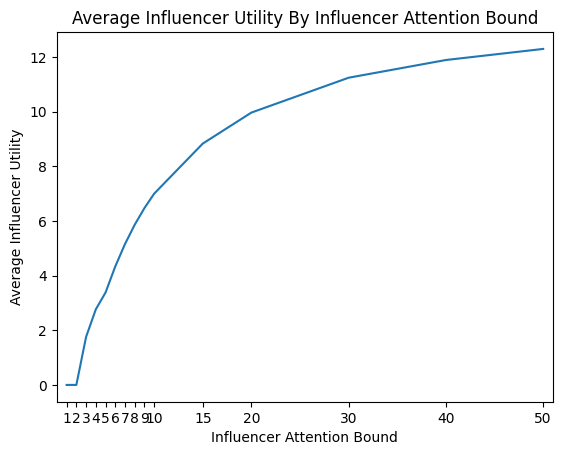

In [18]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", stats['average_influencer_utilities'], tests[varied_param], varied_param_x_label, 'Average Influencer Utility')

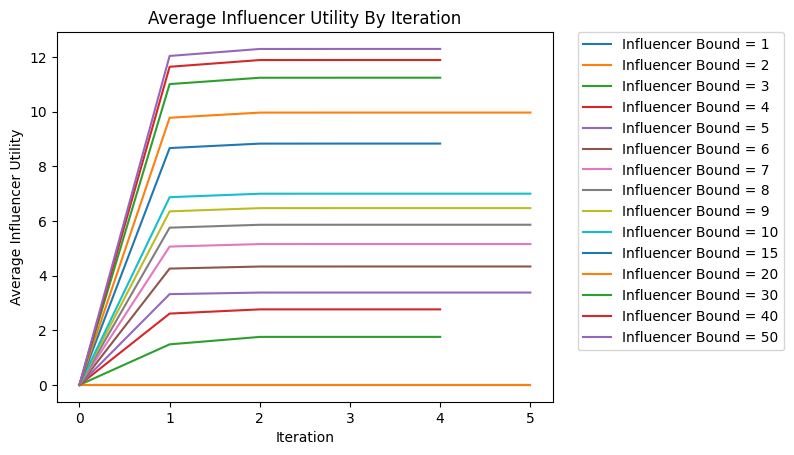

In [19]:
visualize.plot_value_by_iteration_by_test("Average Influencer Utility By Iteration", stats['average_influencer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Influencer Utility')

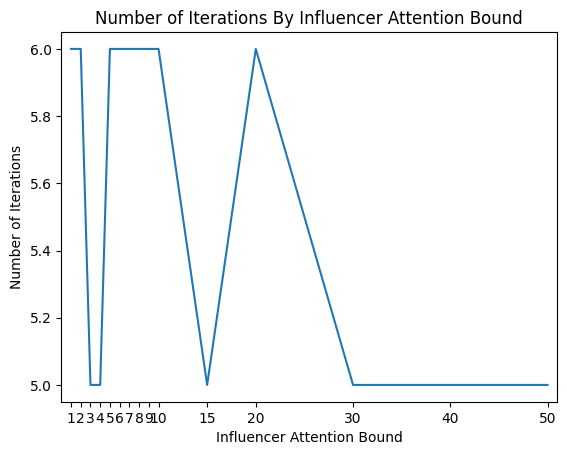

In [20]:
visualize.plot_ending_value_by_test(f"Number of Iterations By {varied_param_x_label}", stats['num_iterations'], tests[varied_param], varied_param_x_label, 'Number of Iterations')